# Sentiment Analysis: Large Movie Review Dataset

This project is related to NLP. As you may already know, the most important and hardest part of an NLP project is pre-processing, which is why we are going to focus on that.

### Getting the data

To access the data for this project, you only need to execute the code below. This will download three files:

- `movies_review_train_aai.csv`: Training dataset you must use to train and find the best hyperparameters on your model.

- `movies_review_test_aai.csv`: Test dataset to test your model.

Basically a basic sentiment analysis problem, as in this case, consists of a classification problem, where the possible output labels are: `positive` and `negative`. Which indicates, if the review of a movie speaks positively or negatively. In our case it is a binary problem, but one could have many more "feelings" tagged and thus allow a more granular analysis.

### These are the objectives of the project:

* Read data that is not in a traditional format.
* Put together a set of preprocessing functions that we can use later on any NLP or related problems.
* Vectorize the data in order to apply a machine learning model to it: using BoW or TF-IDF.
* BoW and TF-IDF are classic ways to vectorize text, but currently we have some more complex ways with better performance, for this we are going to train our own word embedding and use it as a vectorization source for our data.
* Train a sentiment analysis model that allows us to detect positive and negative opinions in movie reviews.

---
## 1. Get the data

**Download the data by executing the code below:**

`Notes:` Use the target column as `positive`, that way the positive value will be indicated with a value of `1` and negative with a value of `0`. In this case, a split train/test is not necessary because the original data is already separated.

In [1]:
from src import data_utils
import os
import sys
import numpy as np
from gensim.models import Word2Vec
import nltk

sys.path.append(os.path.dirname(os.getcwd()))

from src import word2vec
from src import evaluation
from src import text_normalizer

np.random.seed(42)

train, test = data_utils.get_datasets()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from imp import reload 
reload(data_utils)

C:\Users\usuario\AppData\Local\Temp\ipykernel_2588\387812990.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


<module 'src.data_utils' from 'c:\\Users\\usuario\\Desktop\\Gonza\\Anyone AI\\Mati\\Sprint_5\\assignment\\src\\data_utils.py'>

In [3]:
# Split data into training and testing sets using data_utils functions.
X_train, y_train, X_test, y_test = data_utils.split_data(train, test)

---
## 2. Normalize the data

**For this task we will build my own NLP preprocessing library:**

- `remove_html_tags(text):` to remove all HTML tags that may be present in text.
- `remove_accented_chars(text):` to remove accented characters from text
- `expand_contractions(text):` to expand contractions of the type, "don't" to "do not". The contractions are already defined in the "contractions.py" file.
- `lemmatize_text(text):` to lemmatize text.
- `stem_text(text):` to apply stemming (NLTK's PorterStemmer) on text.
- `remove_special_chars(text):` to remove special characters from text.
- `remove_special_chars(text, remove_digits=True):` to remove numbers, note that it is the same function to remove special characters with the addition of an argument that enables or disables the removal of numbers.
- `remove_stopwords(text, stopwords=stop_words):` to remove stopwords from text.
- `remove_extra_new_lines(text):` to remove extra newlines from text.
- `remove_extra_whitespace(text):` to remove extra whitespaces from text.

If we want to add more features that would be great, for example we could start by removing emojis, using different stemming algorithms, etc. The more functions we have the better, remember that the texts are very varied and the preprocessing depends a lot on the source of our data.

To apply each of the functions we created and pre-process the dataset, we must use the `normalize_corpus()` function of the `text_normalizer.py` script. In this method each of the functions we wrote is called, in fact we must enable or disable what we consider necessary (at this point we leave it free choice, for example, you can lemmatize or apply stemming or directly not apply any of the two and so on with the rest, but that is your choice), this function simply groups the previous ones for a more simplified use.

In [4]:
stop_words = nltk.corpus.stopwords.words("english")

In [5]:
from imp import reload 
reload(text_normalizer)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<module 'src.text_normalizer' from 'c:\\Users\\usuario\\Desktop\\Gonza\\Anyone AI\\Mati\\Sprint_5\\assignment\\src\\text_normalizer.py'>

In [6]:
# Let's use this personalized text_normalizer

norm_train_reviews = text_normalizer.normalize_corpus(X_train, stopwords=stop_words)
norm_test_reviews = text_normalizer.normalize_corpus(X_test, stopwords=stop_words)

c:\Users\usuario\Desktop\Gonza\Anyone AI\Mati\Sprint_5\assignment\src\text_normalizer.py:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


**(\*) Functions will be checked using unit tests.**

---
## 3. Feature Engineering

we already have the pre-processed data, now we must vectorize them, because remember that the models only understand numbers. At this stage we can choose whether to vectorize with BoW or with TF-IDF. Later we will train our own embedding but for now we go with a more "classic" vectorization.


In [7]:
# BoW or TF-IDF to vectorize your data.
# Remember that `fit()` method only on the train dataset!
# Also we assign the features to the variables `train_features` and `test_features`.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Instanciate the models
bow_vectorizer=CountVectorizer()
tfidf_vectorizer=TfidfVectorizer()

# Fit the vectorizers
train_features_bow = bow_vectorizer.fit_transform(norm_train_reviews)
test_features_bow = bow_vectorizer.transform(norm_test_reviews)

train_features_tfidf = tfidf_vectorizer.fit_transform(norm_train_reviews)
test_features_tfidf = tfidf_vectorizer.transform(norm_test_reviews)


## 4. Modeling and Performance Evaluation

The model we trained is going to be evaluated on the next meassures:

- `Precision`
- `Recall`
- `F1-Score`
- `Classification Report`
- `Confusion Matrix`
- `ROC Curve`
- `ROC-AUC value`

In [8]:
# Creation and training of the model
# Then we use it to make predictions on the test dataset.
# Later we assign the predictions to the variable `model_predictions`
# that will be used in the following cell to evaluate the model performance.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

baseline_model = LogisticRegression()

param_grid = {
    'C': [0.1, 1.0, 10.0]
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=baseline_model, param_grid=param_grid, cv=3)


######################################
# TF-IDF

# Fit the GridSearchCV on the training data
grid_search.fit(train_features_tfidf, y_train)
# Get the best parameters and the best score
best_params_tfidf = grid_search.best_params_
best_score_tfidf = grid_search.best_score_

print('best_params_tfidf :',best_params_tfidf)
print('best_score_tfidf:',best_score_tfidf)

# Fit
baseline_model.set_params(**best_params_tfidf)
baseline_model.fit(train_features_tfidf, y_train)
# Get predictions
model_predictions_tfidf = baseline_model.predict(test_features_tfidf)
print('model_predictions_tfidf: ',model_predictions_tfidf)

######################################
# BOW

# Fit the GridSearchCV on the training data
grid_search.fit(train_features_bow, y_train)
# Get the best parameters and the best score
best_params_bow = grid_search.best_params_
best_score_bow = grid_search.best_score_

print('best_params_tfidf :',best_params_bow)
print('best_score_tfidf:',best_score_bow)

# Fit
baseline_model.set_params(**best_params_bow)
baseline_model.fit(train_features_bow, y_train)
# Get predictions
model_predictions_bow = baseline_model.predict(test_features_bow)
print('model_predictions_bow: ',model_predictions_bow)



c:\Users\usuario\Desktop\Gonza\Anyone AI\Mati\Sprint_5\assignment\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


best_params_tfidf : {'C': 10.0}
best_score_tfidf: 0.8884001148382868


c:\Users\usuario\Desktop\Gonza\Anyone AI\Mati\Sprint_5\assignment\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model_predictions_tfidf:  [1 0 1 ... 1 1 0]


c:\Users\usuario\Desktop\Gonza\Anyone AI\Mati\Sprint_5\assignment\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\usuario\Desktop\Gonza\Anyone AI\Mati\Sprint_5\assignment\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

best_params_tfidf : {'C': 0.1}
best_score_tfidf: 0.8826000940205594
model_predictions_bow:  [1 0 1 ... 1 1 0]


c:\Users\usuario\Desktop\Gonza\Anyone AI\Mati\Sprint_5\assignment\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from imp import reload 
reload(evaluation)

<module 'src.evaluation' from 'c:\\Users\\usuario\\Desktop\\Gonza\\Anyone AI\\Mati\\Sprint_5\\assignment\\src\\evaluation.py'>

In [10]:
accuracy, precision, recall, f1_score = evaluation.get_performance(
    model_predictions_bow, y_test.values)

Model Performance metrics:
------------------------------
Accuracy: 0.87628
Precision: 0.8775788713173316
Recall: 0.87456
F1 Score: 0.8760668349561246

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.88      0.87      0.88     12500
           0       0.87      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  10975   1525
1   1568  10932


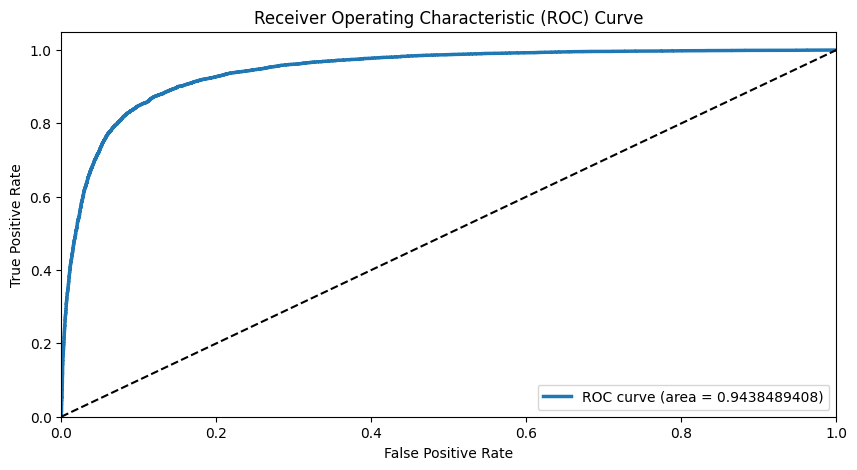

0.9438489408

In [11]:
evaluation.plot_roc(baseline_model, y_test, test_features_bow)

In [12]:
accuracy, precision, recall, f1_score = evaluation.get_performance(
    model_predictions_tfidf, y_test.values)

Model Performance metrics:
------------------------------
Accuracy: 0.87592
Precision: 0.8821567989590111
Recall: 0.86776
F1 Score: 0.8748991772866591

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.88      0.87      0.87     12500
           0       0.87      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  11051   1449
1   1653  10847


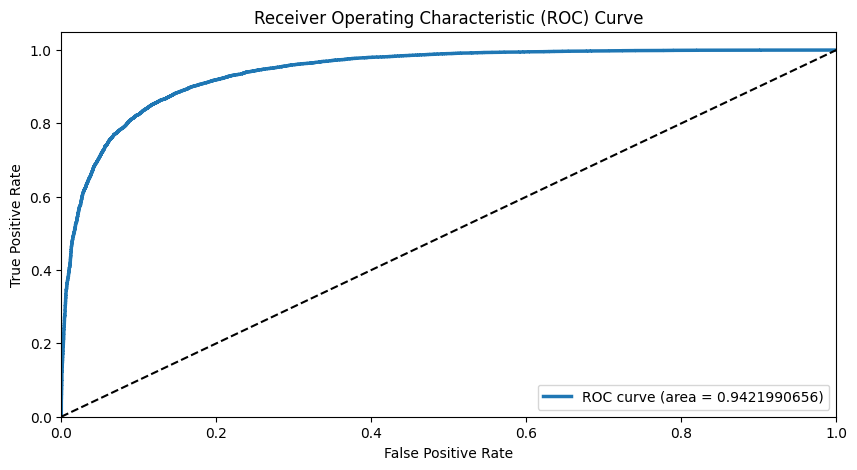

0.9421990656

In [13]:
evaluation.plot_roc(baseline_model, y_test, test_features_tfidf)

---

## 5. Classifying using K-Means

Let use tfidf features computed in last section as vector inputs for kmeans.

In [14]:
# Train the k-means clustering model using `n_clusters=2`.
# Having the model trained, use it to make predictions on the test dataset.
# Assign the predictions to the variable `kmeans_predictions`, it will be used in the
# following cell to evaluate the model performance.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)

kmeans.fit(train_features_tfidf)
print(f"Converged after {kmeans.n_iter_} iterations")
kmeans_predictions = kmeans.predict(test_features_tfidf)

c:\Users\usuario\Desktop\Gonza\Anyone AI\Mati\Sprint_5\assignment\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Converged after 18 iterations


In [15]:
accuracy, precision, recall, f1_score = evaluation.get_performance(
    [1 - el for el in kmeans_predictions], y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.42496
Precision: 0.37111843913162956
Recall: 0.21608
F1 Score: 0.27313176256446553

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.37      0.22      0.27     12500
           0       0.45      0.63      0.52     12500

    accuracy                           0.42     25000
   macro avg       0.41      0.42      0.40     25000
weighted avg       0.41      0.42      0.40     25000


Prediction Confusion Matrix:
------------------------------
      0     1
0  7923  4577
1  9799  2701


---
## 6. Feature Engineering with Custom Word Embedding

### Tokenize reviews and train your own Word Embedding

We are going to have to train our own word embedding, for this we are going to use the __gensim__ library. The only requirement is that the $vector\_size=100$.

[Here](https://radimrehurek.com/gensim/models/word2vec.html) you can read Gensim's Word2Vec documentation so you can train your own embedding, using the review data as a corpus.

As a previous step to training your word embedding we must tokenize the corpus, this may take a bit depending on the size of the dataset and the tokenizer we use, we will try the NLTK tokenizer called `ToktokTokenizer`, which turns out to be a little faster (we hope that this recommendation does not bias the work)

In [10]:
# Tokenize text corpus and use them to train
# a Word2Vec model.

from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()

# Create and store here the tokenized train and test data.
tokenized_train = [tokenizer.tokenize(text) for text in norm_train_reviews]
tokenized_test = [tokenizer.tokenize(text) for text in norm_test_reviews]

# Train Word2Vec model and assign it to `model_w2v`.
# The output model vector size (w2v_vector_size) is set by default to 100
w2v_vector_size = 100
model_w2v = Word2Vec(sentences=tokenized_train, vector_size=w2v_vector_size, min_count=1)

### Generate averaged word vector features

Once the embedding has been trained, we must use it. Remember that embedding will convert each word we pass to it into a vector of a given dimension (in our case $vector\_size=100$). So in order to obtain a vector for each review, we must average the vectors of all the words that are part of the same review.

The function must have the following form:
* `vectorizer(corpus, model, num_features=100)`


Where:
* `corpus:` corresponds to the entire dataset, in this way we obtain an average vector for each review, with a single call to the function.
* `model:` is your trained model.
* `num_features:` the dimension of the output vector of your embedding (remember that in our case we set this value to 100).

This is done in the `vectorize` function of the `word2vec.py` module.

In [17]:
from imp import reload 
reload(word2vec)

<module 'src.word2vec' from 'c:\\Users\\usuario\\Desktop\\Gonza\\Anyone AI\\Mati\\Sprint_5\\assignment\\src\\word2vec.py'>

In [18]:
w2v_train_features = word2vec.vectorizer(
    corpus=tokenized_train, model=model_w2v, num_features=w2v_vector_size
)
w2v_test_features = word2vec.vectorizer(
    corpus=tokenized_test, model=model_w2v, num_features=w2v_vector_size
)


### Modeling

Finally we can train a new model, it can be the same one we used before and then compare the results we got using BoW/TF-IDF and Word2Vec.

In addition to training the model we show:

* `Accuracy`
* `Recall`
* `F1-Score`
* `Classification Report`
* `Confusion Matrix`
* `ROC Curve`
* `Obtain the ROC-AUC value (later we will do a small minimum performance check with this value)`

In [19]:
# Train and choose the best model for the task.
# Assign this model to the `best_model` variable.

import lightgbm as lgb

baseline_model_lgbm=lgb.LGBMClassifier()

parameters_lgbm= {
    'max_depth': 100 ,
    'learning_rate': 0.1 ,
    'n_estimators': 2000
}

baseline_model_lgbm.set_params(**parameters_lgbm)
baseline_model_lgbm.fit(w2v_train_features, y_train)

model_predictions_lgbm = baseline_model_lgbm.predict(w2v_test_features)

In [20]:
# Use the `get_performance()` function from `evaluation.py` module to show
# the model performance.
accuracy, precision, recall, f1_score = evaluation.get_performance(
    model_predictions_lgbm, y_test.values)

Model Performance metrics:
------------------------------
Accuracy: 0.83456
Precision: 0.8364440868865648
Recall: 0.83176
F1 Score: 0.8340954673084637

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.84      0.83      0.83     12500
           0       0.83      0.84      0.84     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  10467   2033
1   2103  10397


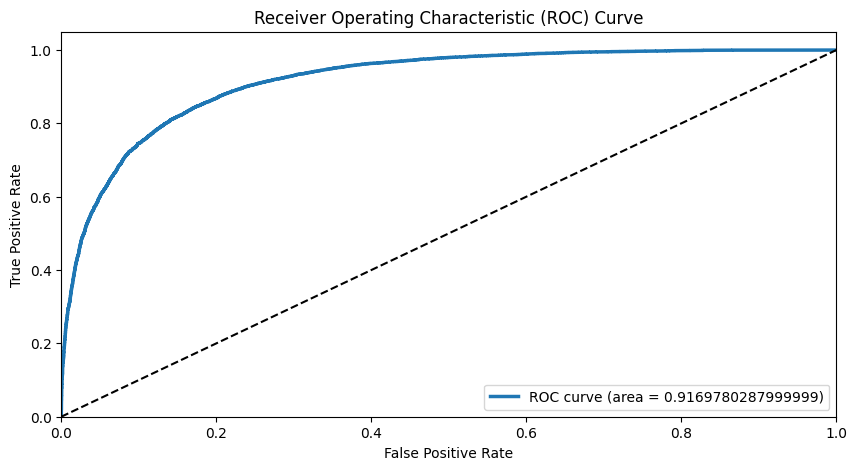

0.9169780287999999

In [21]:
# Use the `plot_roc()` function from `evaluation.py` module to show
# the model ROC curve.
evaluation.plot_roc(baseline_model_lgbm, y_test, w2v_test_features)

In [30]:
import xgboost as xgb

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

best_params_word_xgb={
    'learning_rate':  0.01,
    'n_estimators': 2000,
    'max_depth':  30
    }

xgb_classifier.set_params(**best_params_word_xgb)
xgb_classifier.fit(w2v_train_features, y_train)

model_predictions_w2vect_boost = xgb_classifier.predict(w2v_test_features)

In [31]:
accuracy, precision, recall, f1_score = evaluation.get_performance(
    model_predictions_w2vect_boost, y_test.values)

Model Performance metrics:
------------------------------
Accuracy: 0.83188
Precision: 0.8309533306741125
Recall: 0.83328
F1 Score: 0.8321150389454764

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.83      0.83      0.83     12500
           0       0.83      0.83      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  10381   2119
1   2084  10416


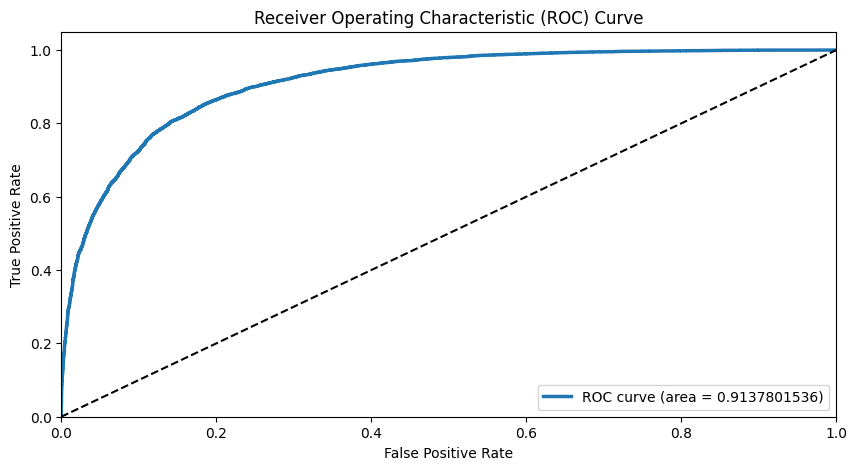

0.9137801536

In [33]:
evaluation.plot_roc(xgb_classifier, y_test, w2v_test_features)

## 7. Predict data

- Take the best model
- Take `test data` (i.e. the dataset after doing the preprocessing and feature engineering part)
- Run the data through this model and save the predictions on the `positive` column in the `test` DataFrame (yeah that we've loaded at the very beginning of this notebook).
- This model will fill values in the positive column using the model predictions.
- Save the modified version of the DataFrame with the name (`dataset/movies_review_predict_aai.csv`).


In [22]:
from src import config
from pathlib import Path
DATASET_TEST_PREDICT = str(Path(config.DATASET_ROOT_PATH) / "movies_review_predict_aai.csv")
test_preds = model_predictions_lgbm
test["positive"] = test_preds
test.to_csv(DATASET_TEST_PREDICT, index=False)

---
### EXTRA:

In our case, we train a word embedding from scratch, which is very good at an educational level, but when applying it to a real problem, we need a lot of data (which is not the case with our problem). Therefore, we invite to investigate and use one of the `pre-trained Word2Vec models`.

If you look for the `Pretrained models` section in this [link](https://radimrehurek.com/gensim/models/word2vec.html), you will find information about the models that Gensim owns.

In [ ]:
import gensim.downloader
glove_w2v = gensim.downloader.load('glove-twitter-200')

In [8]:
from imp import reload 
reload(word2vec)

<module 'src.word2vec' from 'c:\\Users\\usuario\\Desktop\\Gonza\\Anyone AI\\Mati\\Sprint_5\\assignment\\src\\word2vec.py'>

In [18]:
from src import word2vec
w2v_train_features = word2vec.vectorizer_gensim(
    corpus=tokenized_train, model=glove_w2v, num_features=200
)

w2v_test_features = word2vec.vectorizer_gensim(
    corpus=tokenized_test, model=glove_w2v, num_features=200
)

In [13]:

import lightgbm as lgb

baseline_model_lgbm=lgb.LGBMClassifier()

parameters_lgbm= {
    'max_depth': 100 ,
    'learning_rate': 0.1 ,
    'n_estimators': 2000
}

baseline_model_lgbm.set_params(**parameters_lgbm)
baseline_model_lgbm.fit(w2v_train_features, y_train)

model_predictions_lgbm = baseline_model_lgbm.predict(w2v_test_features)

In [14]:
accuracy, precision, recall, f1_score = evaluation.get_performance(
    model_predictions_lgbm, y_test.values)

Model Performance metrics:
------------------------------
Accuracy: 0.82484
Precision: 0.823571599330624
Recall: 0.8268
F1 Score: 0.8251826420216375

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.82      0.83      0.83     12500
           0       0.83      0.82      0.82     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  10286   2214
1   2165  10335


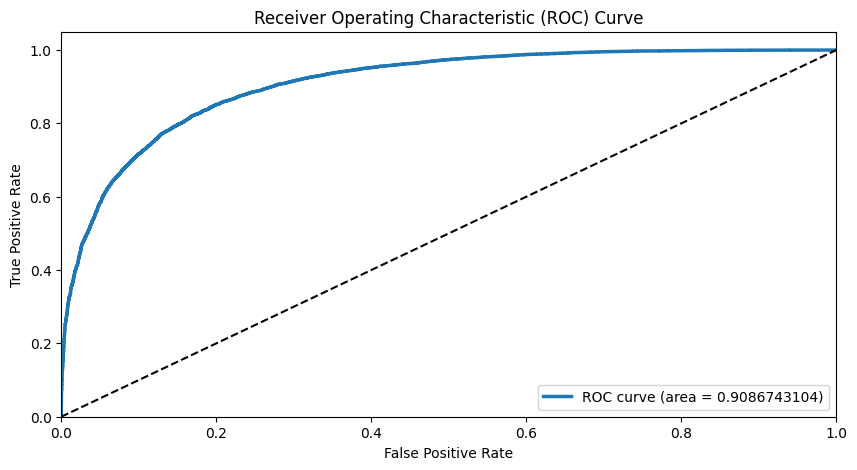

0.9086743104

In [20]:
evaluation.plot_roc(baseline_model_lgbm, y_test, w2v_test_features)